# **チュートリアル：散布図（Scatter Plots）**

In this tutorial, you'll learn how to create advanced **scatter plots**.

# Set up the notebook

As always, we begin by setting up the coding environment.  (_This code is hidden, but you can un-hide it by clicking on the "Code" button immediately below this text, on the right._)

このチュートリアルでは、高度な**散布図**の作成方法を学習します

# ノートブックの設定

いつものように、まずコーディング環境を設定します。(_このコードは非表示になっていますが、このテキストのすぐ下の右側にある "Code" ボタンをクリックすると、非表示を解除できます。_)

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Load and examine the data

We'll work with a (_synthetic_) dataset of insurance charges, to see if we can understand why some customers pay more than others.  

![tut3_insurance](https://storage.googleapis.com/kaggle-media/learn/images/1nmy2YO.png)

If you like, you can read more about the dataset [here](https://www.kaggle.com/mirichoi0218/insurance/home).

# データをロードして検査します。

保険料の (_synthetic_) データセットを使用して、一部の顧客が他の顧客よりも多く支払う理由を理解できるかどうかを確認します。

![tut3_insurance](https://storage.googleapis.com/kaggle-media/learn/images/1nmy2YO.png)

データセットの詳細については、[こちら](https://www.kaggle.com/mirichoi0218/insurance/home)を参照してください。

In [2]:
# Path of the file to read
insurance_filepath = "../input/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

As always, we check that the dataset loaded properly by printing the first five rows.

いつものように、最初の5行を出力して、データセットが正しく読み込まれたことを確認します。

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Scatter plots

To create a simple **scatter plot**, we use the `sns.scatterplot` command and specify the values for:
- the horizontal x-axis (`x=insurance_data['bmi']`), and 
- the vertical y-axis (`y=insurance_data['charges']`).

# 散布図

単純な**散布図**を作成するには、`sns.scatterplot`コマンドを使用し、次の値を指定します。
- 水平x軸 (`x=insurance_data['bmi'] `)
- 縦のy軸 (`y=insurance_data['charges'] `) 。

<Axes: xlabel='bmi', ylabel='charges'>

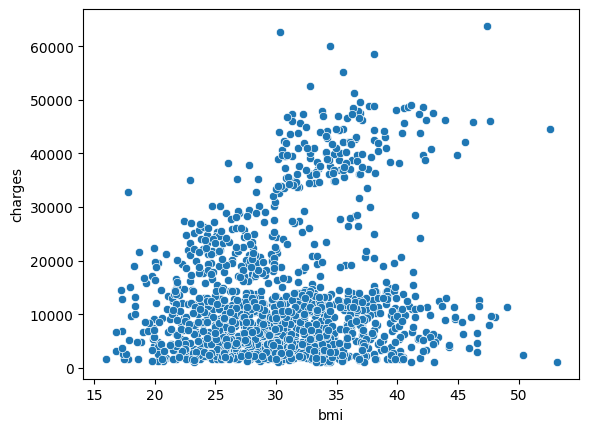

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that [body mass index](https://en.wikipedia.org/wiki/Body_mass_index) (BMI) and insurance charges are **positively correlated**, where customers with higher BMI typically also tend to pay more in insurance costs.  (_This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease._)

To double-check the strength of this relationship, you might like to add a **regression line**, or the line that best fits the data.  We do this by changing the command to `sns.regplot`.

上記の散布図は、[ボディマスインデックス](https://en.wikipedia.org/wiki/Body_mass_index) (BMI) と保険料(charges)が正の相関関係にあることを示唆しており、BMIが高い顧客は一般的に保険料をより多く支払う傾向があります。(BMI高値は一般的に慢性疾患リスクの上昇と関連しているため、このパターンは理にかなっている。_)

この関係の強さを再確認するには、回帰直線、またはデータに最もよく適合する直線を追加できます。これを行うには、コマンドを`sns.regplot`に変更します。

<Axes: xlabel='bmi', ylabel='charges'>

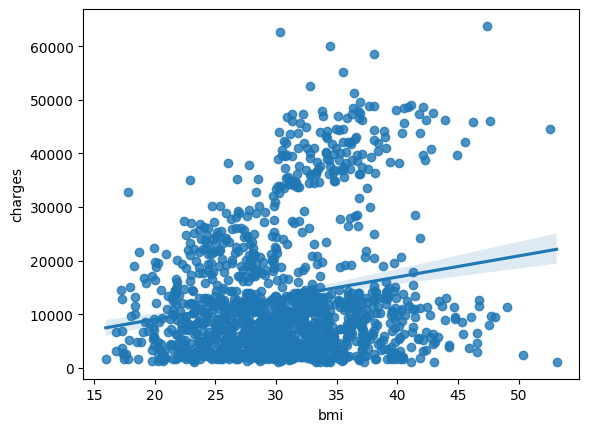

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

# Color-coded scatter plots

We can use scatter plots to display the relationships between (_not two, but..._) three variables!  One way of doing this is by color-coding the points.  

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by `'smoker'`, and plot the other two columns (`'bmi'`, `'charges'`) on the axes.

# 色分けされた散布図

散布図を使用して、3つの変数(_二つではなく..._)間の関係を表示できます。これを行う1つの方法は、ポイントを色分けすることです。

例えば、喫煙がBMIと保険料の関係にどのように影響するかを理解するために、ポイントを(`'bmi'`、`'charges'`)で色分けし、他の2つの列を軸にプロットすることができる。

<Axes: xlabel='bmi', ylabel='charges'>

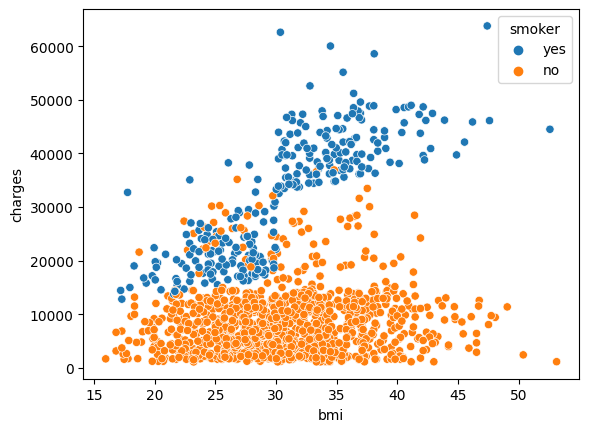

In [6]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the `sns.lmplot` command to add two regression lines, corresponding to smokers and nonsmokers.  (_You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!_)

この散布図は、非喫煙者はBMIの増加とともにわずかに多く支払う傾向があるが、喫煙者ははるかに多く支払うことを示している。

この事実をさらに強調するために、`sns.lmplot`コマンドを使用して、喫煙者と非喫煙者に対応する2つの回帰直線を追加できます。(_喫煙者の回帰直線は、非喫煙者の直線に比べてはるかに急勾配であることがわかります。_)

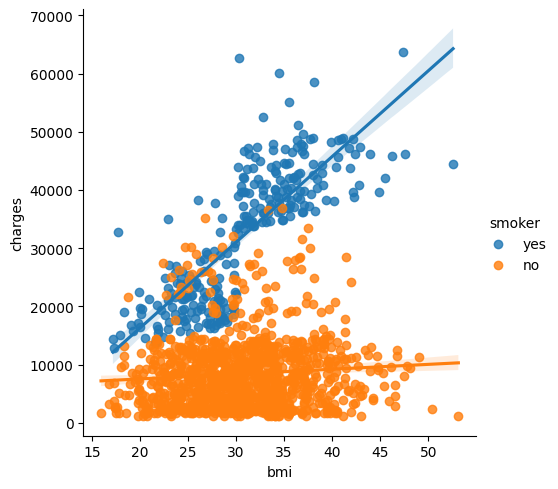

In [7]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

The `sns.lmplot` command above works slightly differently than the commands you have learned about so far:
- Instead of setting `x=insurance_data['bmi']` to select the `'bmi'` column in `insurance_data`, we set `x="bmi"` to specify the name of the column only.  
- Similarly, `y="charges"` and `hue="smoker"` also contain the names of columns.  
- We specify the dataset with `data=insurance_data`.

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots.  Usually, we use scatter plots to highlight the relationship between two continuous variables (like `"bmi"` and `"charges"`).  However, we can adapt the design of the scatter plot to feature a categorical variable (like `"smoker"`) on one of the main axes.  We'll refer to this plot type as a **categorical scatter plot**, and we build it with the `sns.swarmplot` command.

上記の`sns.lmplot`コマンドの動作は、これまでに学習したコマンドとは若干異なります。
- `x=insurance_data['bmi'] `を設定して`insurance_data`の`'bmi'`列を選択する代わりに、`x="bmi"`を設定して列の名前のみを指定します。
- 同様に、`y="charges"`と`hue="smoker"`にも列の名前が含まれます。
- `data=insurance_data`でデータセットを指定します。

最後に、もう1つ学習するプロットがあります。これは、散布図を見慣れている方法とは少し異なるかもしれません。通常、私たちは散布図を使って、2つの連続変数 (「BMI」と「料金」のような) の間の関係を強調する。しかし、散布図のデザインを適応させて、主軸の1つにカテゴリ変数 (「喫煙者」のような) を特徴づけることができる。このプロットタイプを **カテゴリー散布図(categorical scatter plot)** と呼び、`sns.swarmplot`コマンドで作成します。

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='smoker', ylabel='charges'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


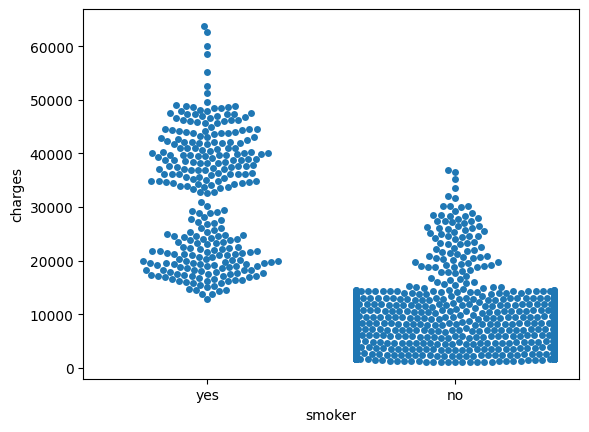

In [8]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Among other things, this plot shows us that:
- on average, non-smokers are charged less than smokers, and
- the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

# What's next?

Apply your new skills to solve a real-world scenario with a **[coding exercise](https://www.kaggle.com/kernels/fork/2951535)**!

特に、このプロットは次のことを示しています。
- 平均して、非喫煙者は喫煙者よりも請求額が少なく、
- 一番お金を払っているのは喫煙者;一方、一番お金を払わないのは非喫煙者です。

# 次は何?

新しいスキルを適用して、現実世界のシナリオを解決する**[コーディング演習](https://www.kaggle.com/kernels/fork/2951535)**!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*

---




*質問やコメントがありますか？[コースディスカッションフォーラム](https://www.kaggle.com/learn/data-visualization/discussion)で他の学習者とチャットしてください。*